<a href="https://colab.research.google.com/github/sidhyaashu/DL_Project_Chrun_deetection/blob/master/Batch_normalization_STEP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense ,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [4]:
dataset = pd.read_csv("./customer_data.csv")
dataset.head(5)

,CreditScore,Age,Tenure,Balance,NumberOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,402,55,10,33426.402294,4,0,0,38102.089797,0
1,735,75,9,131056.481938,7,1,0,99561.108895,0
2,570,29,1,198348.523434,4,0,1,59819.129595,0
3,406,40,1,14534.174322,4,0,1,62394.020827,0
4,371,70,0,15415.602390,0,1,1,29219.074733,0


In [5]:
input_dataset = dataset.iloc[:,:-1]
output_dataset = dataset.iloc[:,-1]

In [6]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_dataset),columns=input_dataset.columns)
input_data.head(5)

,CreditScore,Age,Tenure,Balance,NumberOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.012067,0.291220,1.664024,-1.174783,0.128431,-1.032529,-0.955011,-1.259521
1,1.056837,1.400841,1.338638,0.510332,1.434512,0.968496,-0.955011,0.402273
2,0.031705,-1.151287,-1.264450,1.671806,0.128431,-1.032529,1.047108,-0.672313
3,-0.987215,-0.540996,-1.264450,-1.500867,0.128431,-1.032529,1.047108,-0.602690
4,-1.204668,1.123435,-1.589836,-1.485653,-1.613009,0.968496,1.047108,-1.499709


In [7]:
input_data.shape , output_dataset.shape

((1000, 8), (1000,))

In [8]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_dataset,test_size=0.2,random_state=32)


In [9]:
x_train.shape

(800, 8)

In [49]:
ann = Sequential()
ann.add(  Dense(6,input_dim =8,activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(  Dense(5,activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(  Dense(3,activation="relu",kernel_regularizer=l2(l2=0.01)))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(  Dense(1,activation="sigmoid",kernel_regularizer=l2(l2=0.01)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [51]:
ann.fit(x_train,y_train,batch_size=100,epochs=40,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4886 - loss: 0.8979 - val_accuracy: 0.4700 - val_loss: 0.8728
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4931 - loss: 0.8964 - val_accuracy: 0.4550 - val_loss: 0.8696
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4834 - loss: 0.8796 - val_accuracy: 0.4450 - val_loss: 0.8662
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4660 - loss: 0.8996 - val_accuracy: 0.4200 - val_loss: 0.8626
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4574 - loss: 0.8677 - val_accuracy: 0.4150 - val_loss: 0.8591
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5019 - loss: 0.8656 - val_accuracy: 0.4200 - val_loss: 0.8560
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4748 - loss: 0.8734 - val_accuracy: 0.4200 - val_loss: 0.8528
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5130 - loss: 0.8497 - val_accuracy: 0.4300 - val_loss: 0.8499
Epo

In [52]:
# ann.history.history

In [53]:
train_acc = ann.history.history["accuracy"]
test_acc = ann.history.history["val_accuracy"]

In [54]:
len(test_acc)

40

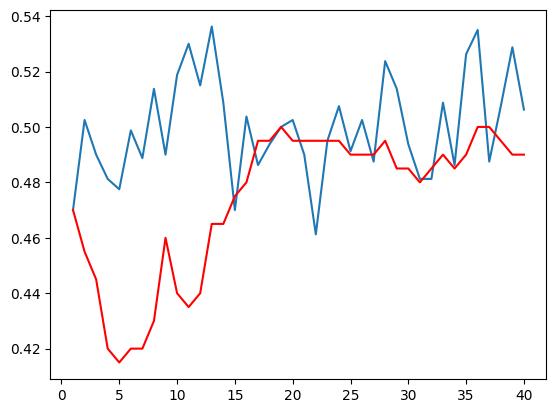

In [55]:
plt.plot([i for i in range(1,41)],train_acc)
plt.plot([i for i in range(1,41)],test_acc,c="red")
plt.show()

In [56]:
prd = ann.predict(x_test)
prd1 = ann.predict(x_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [57]:
prd_data =[]
for i in prd:
    if i>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [58]:
prd_data1 =[]
for i in prd1:
    if i>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

In [59]:
accuracy_score(y_test,prd_data)*100

49.0

In [60]:
accuracy_score(y_train,prd_data1)*100

50.0

In [37]:
input_data = np.array([[-1.012067, 0.291220, 1.664024, -1.174783, 0.128431, -1.032529, -0.955011, -1.259521]])

prd = ann.predict(input_data)

prd_data = []

for i in prd:
    if i > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

prd_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[0]